In [28]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import mplhep as hep
hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'
import ROOT


plt.rcParams["figure.figsize"] = (10, 8)


In [107]:
import uproot as ur
events = ur.open(f'insert_reco_pi-_50GeV_theta_deg.edm4hep.root:events')
arrays = events.arrays()
print(len(arrays))
print(arrays.fields)

500
['HcalEndcapPInsertHitsDigi.cellID', 'HcalEndcapPInsertHitsDigi.amplitude', 'HcalEndcapPInsertHitsDigi.timeStamp', 'HcalEndcapPInsertHitsReco.cellID', 'HcalEndcapPInsertHitsReco.energy', 'HcalEndcapPInsertHitsReco.energyError', 'HcalEndcapPInsertHitsReco.time', 'HcalEndcapPInsertHitsReco.timeError', 'HcalEndcapPInsertHitsReco.position.x', 'HcalEndcapPInsertHitsReco.position.y', 'HcalEndcapPInsertHitsReco.position.z', 'HcalEndcapPInsertHitsReco.dimension.x', 'HcalEndcapPInsertHitsReco.dimension.y', 'HcalEndcapPInsertHitsReco.dimension.z', 'HcalEndcapPInsertHitsReco.sector', 'HcalEndcapPInsertHitsReco.layer', 'HcalEndcapPInsertHitsReco.local.x', 'HcalEndcapPInsertHitsReco.local.y', 'HcalEndcapPInsertHitsReco.local.z', 'InclusiveKinematicsTruth.x', 'InclusiveKinematicsTruth.Q2', 'InclusiveKinematicsTruth.W', 'InclusiveKinematicsTruth.y', 'InclusiveKinematicsTruth.nu', 'InclusiveKinematicsTruth#0.index', 'InclusiveKinematicsTruth#0.collectionID', 'MCParticles.PDG', 'MCParticles.generat

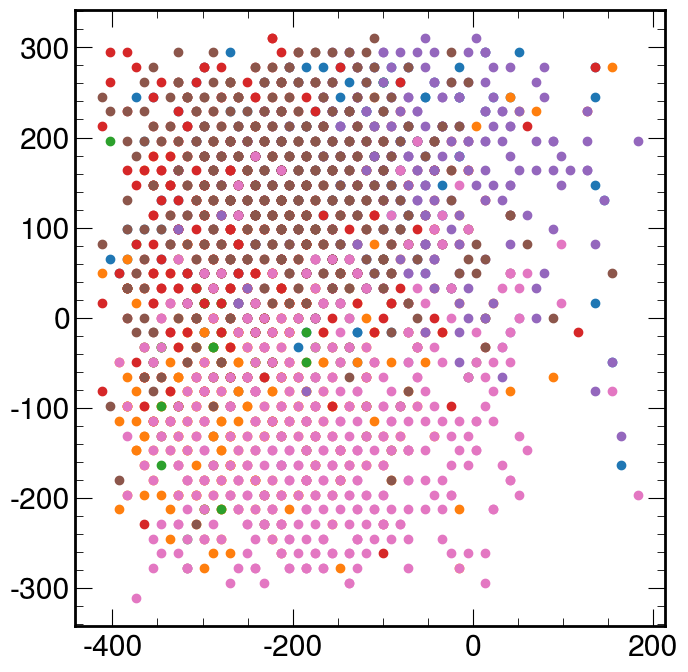

In [108]:
for event in range(len(events)):
    x=arrays['HcalEndcapPInsertHitsReco.position.x'][event]
    y=arrays['HcalEndcapPInsertHitsReco.position.y'][event]
    z=arrays['HcalEndcapPInsertHitsReco.position.z'][event]
    E=arrays['HcalEndcapPInsertHitsReco.energy'][event]
    isSmall=arrays['HcalEndcapPInsertHitsReco.dimension.x'][event]<40
    plt.scatter(x[isSmall],y[isSmall])
plt.gca().set_aspect(1)
plt.show()

In [157]:
from scipy.optimize import curve_fit

def gauss(x, A,mu, sigma):
    return A * np.exp(-(x-mu)**2/(2*sigma**2))

def res_plot(a, fnc=gauss, bins=None, label=None):
    h,x=np.histogram(a, bins=bins)
    bc=(x[1:]+x[:-1])/2
    plt.errorbar(bc, h, np.sqrt(h), marker='o', ls='', label=label)
    p0=[10,0, np.std(dxs)]
    slc=h>0
    coeff, var_matrix = curve_fit(fnc, bc[slc], h[slc], p0=p0,
                             sigma=np.sqrt(h[slc]))
    x=np.linspace(x[0], x[-1], 100)
    plt.plot(x, fnc(x,*coeff), label=f"fit: $\\sigma={coeff[2]:.1f}\\pm{np.sqrt(var_matrix[2][2]):.1f}$ mm")
    plt.legend(loc='upper left')
    

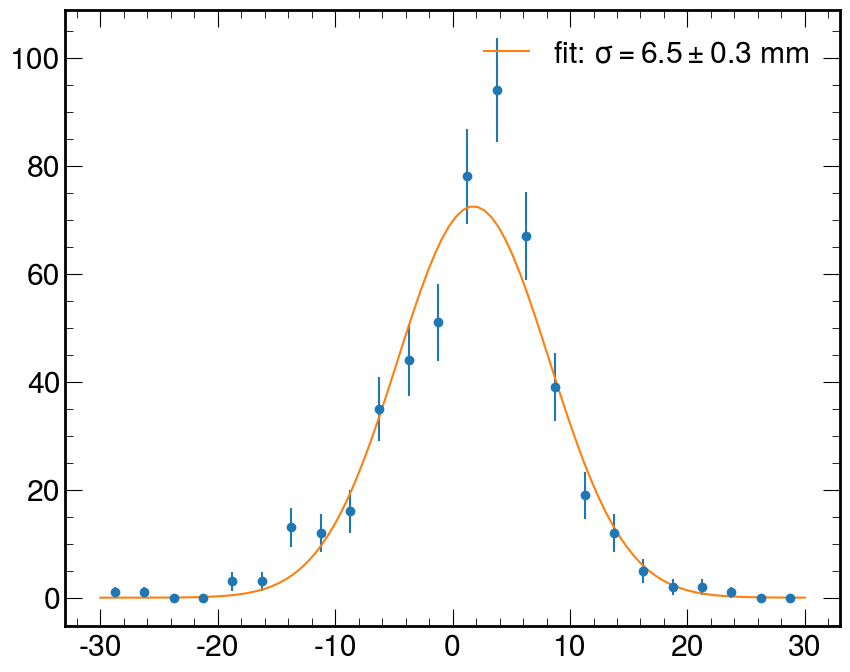

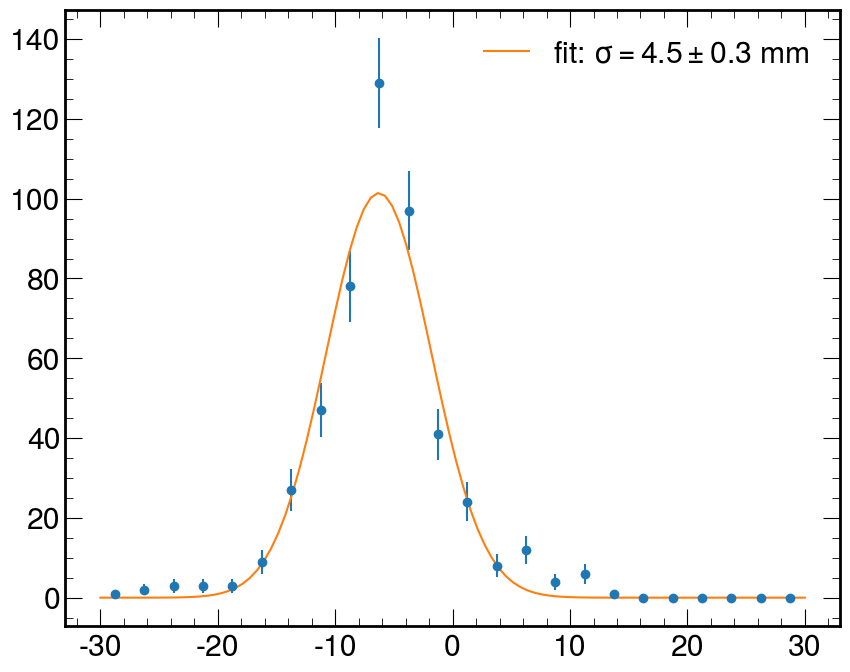

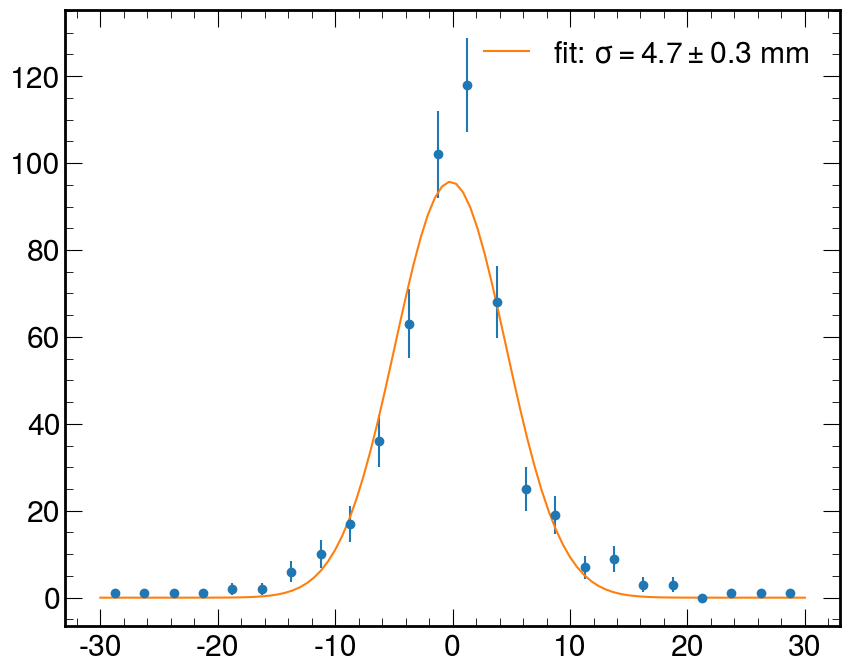

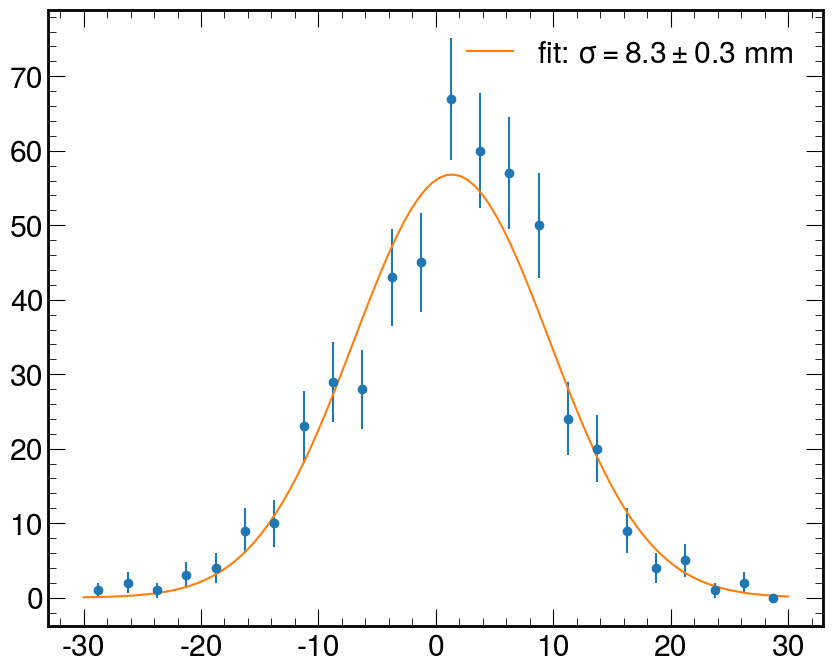

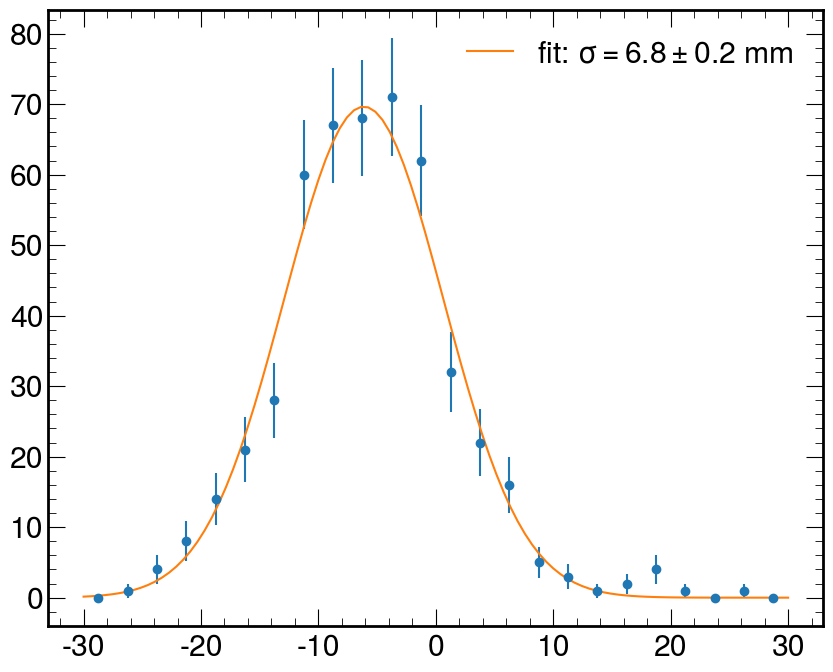

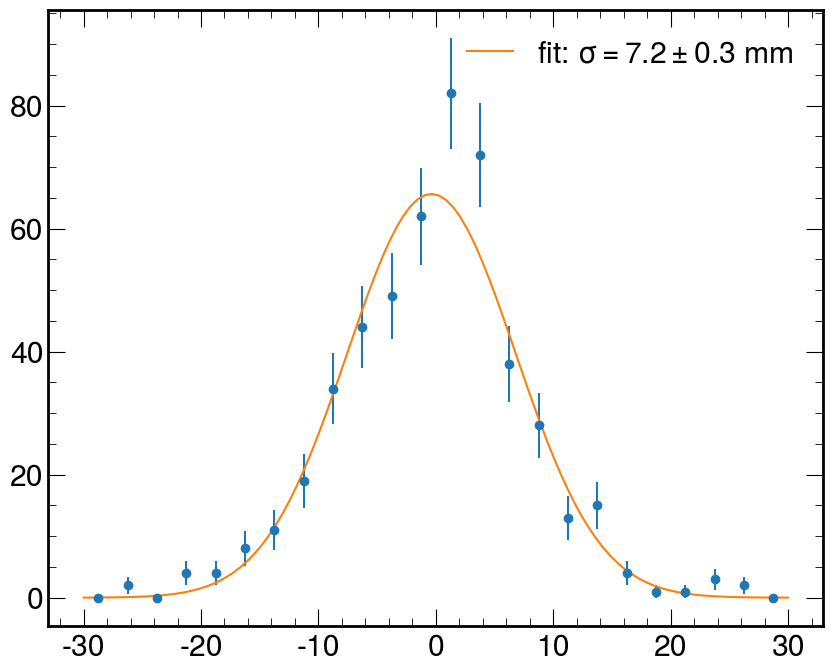

In [121]:
plt.subplots(2,2)
for i, tag in enumerate(["staggered", "unstaggered"]):
    import uproot as ur
    events = ur.open(f'cache/{tag}/insert_reco_pi-_50GeV_theta_deg.edm4hep.root:events')
    arrays = events.arrays()
    #print(len(arrays))
    #print(arrays.fields)
    w0=4.0
    drs=[]
    dxs=[]
    dys=[]
    for event in range(len(arrays)):
        x=arrays['HcalEndcapPInsertHitsReco.position.x'][event]
        y=arrays['HcalEndcapPInsertHitsReco.position.y'][event]
        z=arrays['HcalEndcapPInsertHitsReco.position.z'][event]
        E=arrays['HcalEndcapPInsertHitsReco.energy'][event]
        #lay=arrays['HcalEndcapPInsertHitsReco.layer'][event]
        sl=arrays['HcalEndcapPInsertHitsReco.dimension.x'][event]
        if sum(E)==0:
            print("warning total energy deposited is zero")
            continue

        w=w0+np.log((E+.0000001)/sum(E))
        w=w*(w>0)
        w=w/sl**2
        x_reco=sum(x*w)/sum(w)
        y_reco=sum(y*w)/sum(w)
        z_reco=sum(z*w)/sum(w)

        px=arrays["MCParticles.momentum.x"][event,2]
        py=arrays["MCParticles.momentum.y"][event,2]
        pz=arrays["MCParticles.momentum.z"][event,2]

        x_truth=px/pz*z_reco
        y_truth=py/pz*z_reco
        r_reco=np.hypot(x_reco,y_reco)
        r_truth=np.hypot(x_truth,y_truth)
        drs.append(r_reco-r_truth)
        dxs.append(x_reco-x_truth)
        dys.append(y_reco-y_truth)
    
    res_plot(drs, bins=np.linspace(-30, 30, 25))
    plt.show()
    res_plot(dxs, bins=np.linspace(-30, 30, 25))
    plt.show()
    res_plot(dys, bins=np.linspace(-30, 30, 25))
    plt.show()

In [141]:
for event in range(len(arrays)):
    x=arrays['HcalEndcapPInsertHitsReco.position.x'][event]
    y=arrays['HcalEndcapPInsertHitsReco.position.y'][event]
    isSmall=arrays['HcalEndcapPInsertHitsReco.dimension.x'][event]<40
    #print(arrays['HcalEndcapPInsertHitsReco.dimension.x'][event][isSmall])
    print(set((x[isSmall]/(18.89*3/2))%1))
    #if 0 in y:
    #    print("yes y")

{0.8041293621063232, 0.8041292428970337, 0.8041296005249023, 0.8041291236877441, 0.8041291832923889, 0.8041286468505859}
{0.8041286468505859, 0.8041296005249023, 0.8041292428970337, 0.8041291236877441, 0.8041291832923889}
{0.8041291236877441, 0.8041292428970337, 0.8041291832923889, 0.8041286468505859, 0.8041296005249023, 0.8041293621063232}
{0.8041291236877441, 0.8041286468505859, 0.8041296005249023, 0.8041292428970337, 0.8041291832923889, 0.8041293621063232}
{0.8041286468505859, 0.8041291236877441, 0.8041293621063232, 0.8041296005249023, 0.8041292428970337, 0.8041291832923889}
{0.8041286468505859, 0.8041296005249023, 0.8041292428970337, 0.8041291236877441, 0.8041291832923889}
{0.8041291236877441, 0.8041286468505859, 0.8041293621063232, 0.8041292428970337, 0.8041291832923889, 0.8041296005249023}
{0.8041293621063232, 0.8041291832923889, 0.8041286468505859, 0.8041292428970337, 0.8041291236877441, 0.8041296005249023}
{0.8041291236877441, 0.8041296005249023, 0.8041292428970337, 0.804129362

In [140]:
(0.7061934471130371)**2

0.49870918474539394

In [146]:
def get_xyzr_reco(arrays, event, w0=4):
    x=arrays['HcalEndcapPInsertHitsReco.position.x'][event]
    y=arrays['HcalEndcapPInsertHitsReco.position.y'][event]
    z=arrays['HcalEndcapPInsertHitsReco.position.z'][event]
    E=arrays['HcalEndcapPInsertHitsReco.energy'][event]
    #lay=arrays['HcalEndcapPInsertHitsReco.layer'][event]
    sl=arrays['HcalEndcapPInsertHitsReco.dimension.x'][event]

    w=w0+np.log((E+.0000001)/sum(E))
    w=w*(w>0)
    w=w/sl**2
    x_reco=sum(x*w)/sum(w)
    y_reco=sum(y*w)/sum(w)
    z_reco=sum(z*w)/sum(w)
    r_reco=np.hypot(x_reco,y_reco)
    return [x_reco,y_reco,z_reco,r_reco]

In [147]:
def get_xyzr_truth(arrays, event, w0=4):
    z=arrays['HcalEndcapPInsertHitsReco.position.z'][event]
    E=arrays['HcalEndcapPInsertHitsReco.energy'][event]
    #lay=arrays['HcalEndcapPInsertHitsReco.layer'][event]
    sl=arrays['HcalEndcapPInsertHitsReco.dimension.x'][event]

    w=w0+np.log((E+.0000001)/sum(E))
    w=w*(w>0)
    w=w/sl**2
    z_reco=sum(z*w)/sum(w)
    
    px=arrays["MCParticles.momentum.x"][event,2]
    py=arrays["MCParticles.momentum.y"][event,2]
    pz=arrays["MCParticles.momentum.z"][event,2]

    x_truth=px/pz*z_reco
    y_truth=py/pz*z_reco
    z_truth=z_reco
    r_truth=np.hypot(x_truth,y_truth)
    
    return [x_truth,y_truth,z_truth,r_truth]

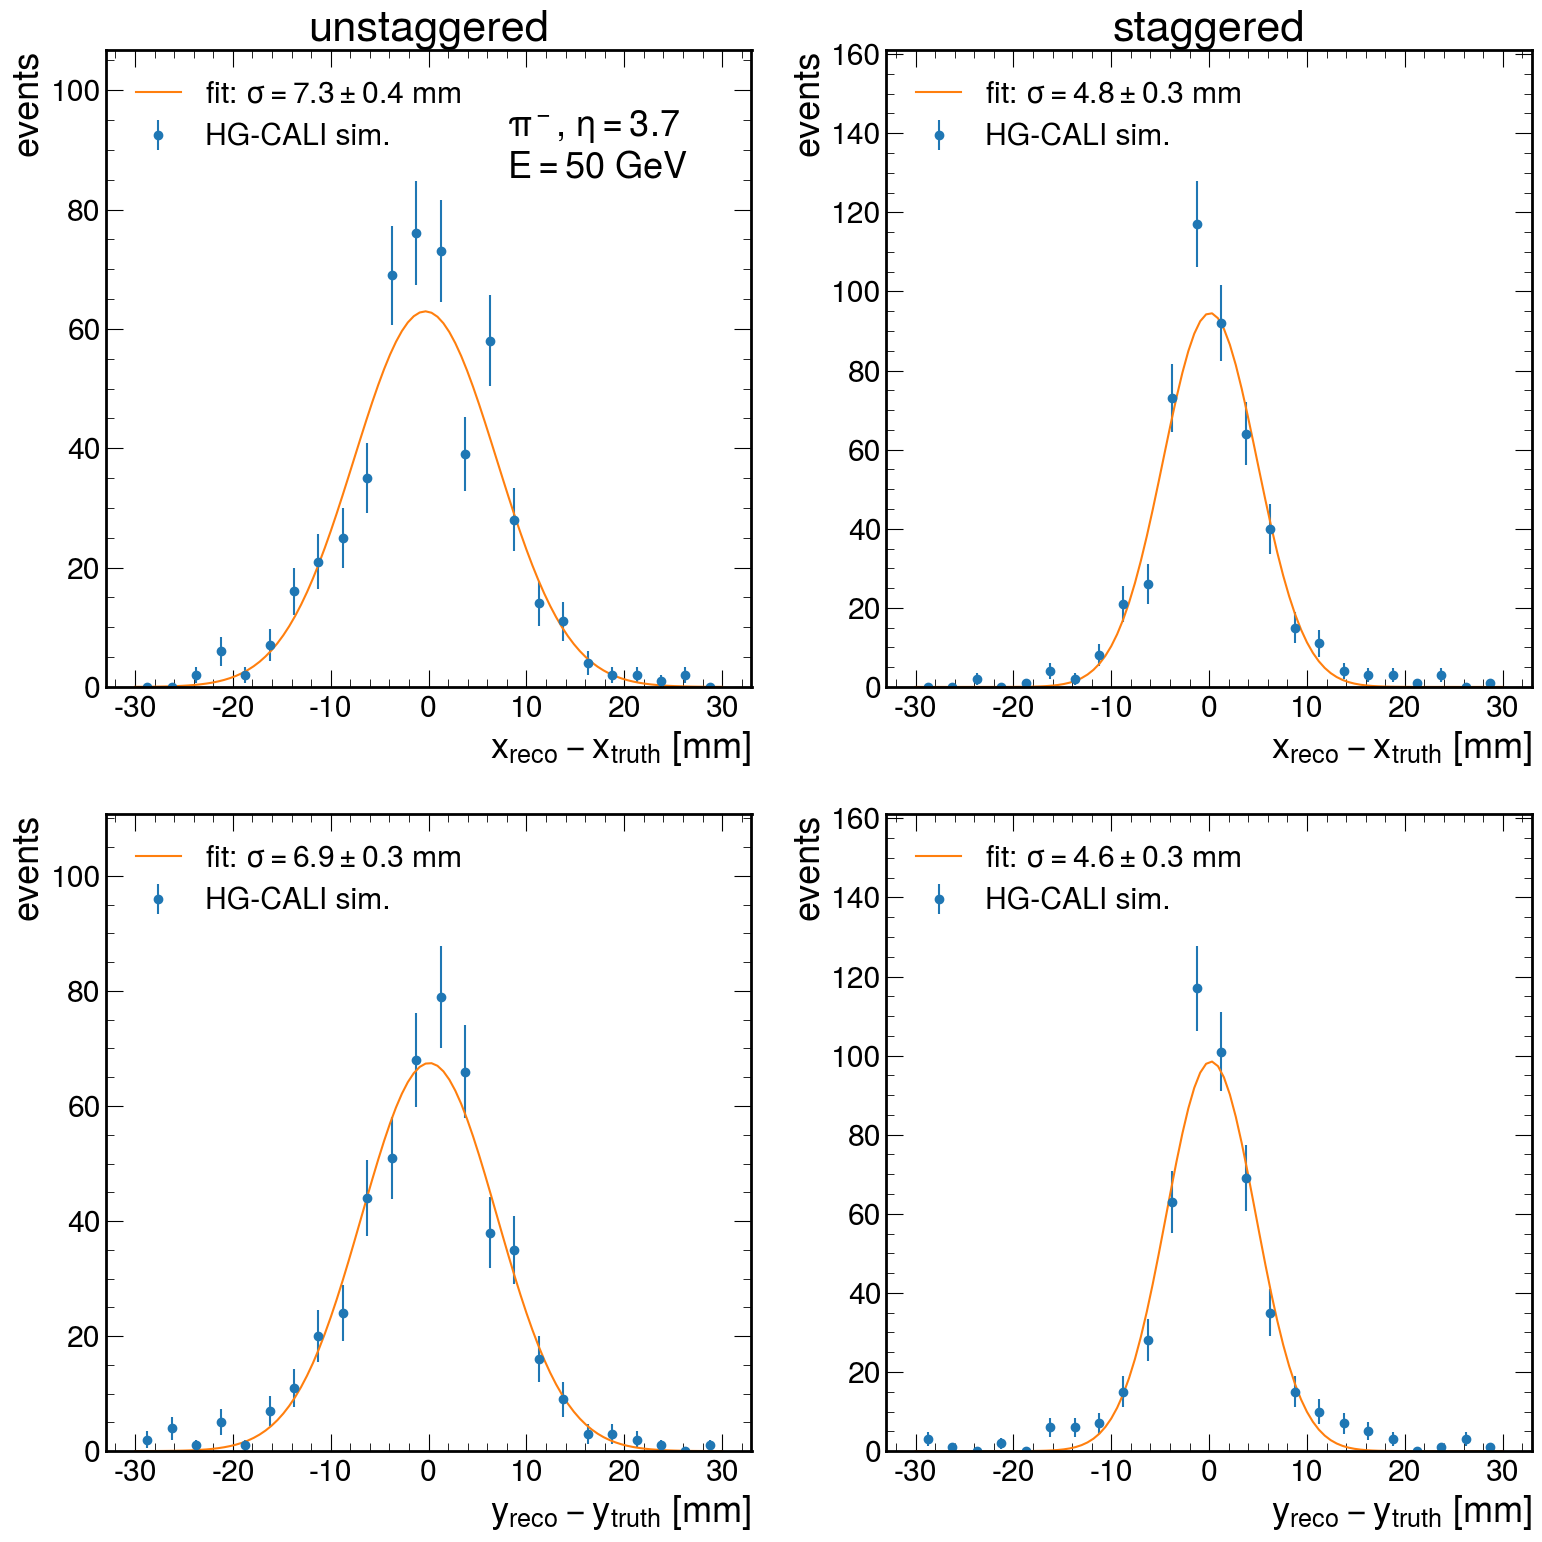

In [166]:
fig, axs=plt.subplots(2,2, figsize=(16,16))

for i, tag in enumerate(["unstaggered", "staggered"]):
    import uproot as ur
    events = ur.open(f'cache/{tag}/insert_reco_pi-_50GeV_theta_deg.edm4hep.root:events')
    arrays = events.arrays()
    #print(len(arrays))
    #print(arrays.fields)
    w0=4.0
    drs=[]
    dxs=[]
    dys=[]
    for event in range(len(arrays)):
        x_reco, y_reco, _, r_reco=get_xyzr_reco(arrays, event, w0=4)
        x_truth, y_truth, _, r_truth=get_xyzr_truth(arrays, event, w0=4)
        
        drs.append(r_reco-r_truth)
        dxs.append(x_reco-x_truth)
        dys.append(y_reco-y_truth)
    
    #res_plot(drs, bins=np.linspace(-30, 30, 25))
    #plt.show()
    
    plt.sca(axs[0][i])
    plt.title(tag)
    
    res_plot(dxs, bins=np.linspace(-30, 30, 25), label='HG-CALI sim.')
    plt.xlabel("$x_{\\rm reco}-x_{\\rm truth}$ [mm]")
    plt.ylabel("events")
    plt.ylim(0, plt.gca().get_ylim()[1]*1.2)
    plt.sca(axs[1][i])
    res_plot(dys, bins=np.linspace(-30, 30, 25), label="HG-CALI sim.")
    plt.xlabel("$y_{\\rm reco}-y_{\\rm truth}$ [mm]")
    plt.ylabel("events")
    plt.ylim(0, plt.gca().get_ylim()[1]*1.2)
kin_txt="$\pi^-$, $\eta=3.7$\n$E=50$ GeV"
axs[0][0].text(8, axs[0][0].get_ylim()[1]*.8, kin_txt)
plt.tight_layout()
plt.savefig("../images/xy_hg-cali.pdf")
plt.show()

# $\frac{d\eta}{d\theta}=\frac{-1}{\sin\theta}$

In [169]:
z=get_xyzr_reco(arrays, event, w0=4)[2]
print(z)

3945.722127992308


In [170]:
dtheta=4.7/z
theta=2.83*np.pi/180
print(f"dtheta[mrad]={dtheta*1000:.2f}, dtheta[deg]={dtheta*180/np.pi:.2f}, deta={dtheta/np.sin(theta):.2f}")

dtheta[mrad]=1.19, dtheta[deg]=0.07, deta=0.02
